In [10]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [11]:
m = 2000 # number of points
n = 3 # representation dimension
t = 2 # number of neighbors measured

In [12]:
def t_nearest_matr(m, t, X):
    t_nearest = np.ones((m, t), dtype=int) * 1
    for id, row in enumerate(X.T):
        dif = X.T - row # get vector representation-wise differences
        norm_indices = np.argsort(np.linalg.norm(dif, axis = 1))
        t_nearest[id] = norm_indices[1: t + 1]
    return t_nearest # returns m x t matrix representing k_nearest

In [13]:
def weight_matr(m, N, X, sigma):
    X = X.T # transpose the data matrix for ease in W_ij calculation
    W = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            if i in N[j]:
                W[i][j] = np.exp(np.linalg.norm(X[i] - X[j]) / (sigma ** 2))
    return W

In [14]:
def diag_matr(m, W):
    D = np.zeros((m, m))
    for i in range(m):
        D[i][i] = np.sum(W[i])
    return D

In [15]:
def get_le_reduced(k, t, sigma, X):
    m = len(X[0])
    N = t_nearest_matr(m, t, X)
    W = weight_matr(m, N, X, sigma)
    D = diag_matr(m, W)
    L = D - W

    print(f"N sample is {N[:6]}")
    print(f"W sample is {W[:6]}")
    print(f"D sample is {D[:6]}")

    eigenvalues, eigenvectors = np.linalg.eig(L)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    return sorted_eigenvectors[-k:] # smallest k eigenvectors (rows)

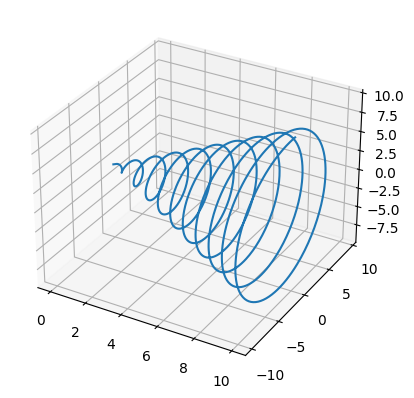

In [16]:
theta = np.linspace(0, 20 * np.pi, m)
r = np.linspace(0, 10, m)
x = r
z = np.cos(theta) * r
y = np.sin(theta) * r
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

In [17]:
X = np.vstack((x, y, z))
X.shape

(3, 2000)

We wish to compare the "Averaged Laplacian Eigenmap" algorithm to the standard
algorithm used by embedding a helix in 2D space. 

N sample is [[1 2]
 [0 2]
 [1 3]
 [2 4]
 [3 5]
 [4 6]]
W sample is [[0.         1.00709969 0.         ... 0.         0.         0.        ]
 [1.00709969 0.         1.00710321 ... 0.         0.         0.        ]
 [1.01424978 1.00710321 0.         ... 0.         0.         0.        ]
 [0.         0.         1.00711024 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
D sample is [[1.00709969 0.         0.         ... 0.         0.         0.        ]
 [0.         2.0142029  0.         ... 0.         0.         0.        ]
 [0.         0.         3.02846323 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


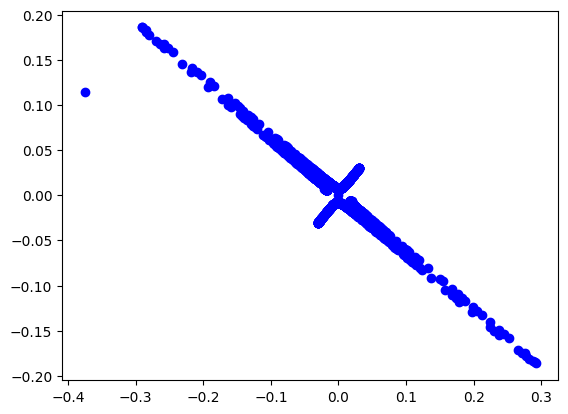

In [18]:
k = 2 # projection dimension
sigma = 1
P = get_le_reduced(k, t, sigma, X)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(P[0, :], P[1, :], c='b', marker='o')
plt.show()